<br>

# Introdução

In [1]:
#!pip3 install py7zr --upgrade

In [1]:
import os
import py7zr
import geopandas as gpd

In [2]:
from paths import *

In [3]:
list_files = os.listdir(gpkg_path)
list_files

['sp_050k_wgs84.gpkg', 'sp_250k_wgs84.gpkg']

<br>

## Write

In [5]:
for file in list_files:
    # File
    filename = file.split('.', maxsplit=1)[0]
    print(filename)

    # Paths
    zip7_filepath = os.path.join(zips_path, '{}.7z'.format(filename))
    gpkg_filepath = os.path.join(gpkg_path, file)

    # Write 7zip
    with py7zr.SevenZipFile(zip7_filepath, 'w') as archive:
        archive.write(gpkg_filepath, os.path.basename(gpkg_filepath))

sp_050k_wgs84
sp_250k_wgs84


<br>

## Read

sp_250k_wgs84.gpkg
epsg:4326


,id_municipio,municipio_nome,geometry
0,3500105,Adamantina,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,Adolfo,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,Aguaí,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,Águas da Prata,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,Águas de Lindóia,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."


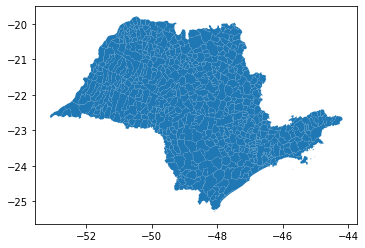

In [6]:
with py7zr.SevenZipFile(os.path.join(zips_path, 'sp_250k_wgs84.7z'), 'r') as archive:
    allfiles = archive.getnames()
    print(allfiles[0])
    
    # Quero apenas um arquivo por gpkg
    if len(allfiles) == 1:
        for filename, bio in archive.read(allfiles).items():
            print(bio)

# Geodataframe
gdf = gpd.read_file(bio)

# Results
print(gdf.crs)
gdf.plot()
display(gdf.head())